## 2조. CNN

### 1. 합성곱신경망 (30점)

#### 1. 완전연결신경망과 CNN의 차이에 대해 작성해주세요. (4점)

답: 완전연결신경망(FCN)은 모든 노드가 서로 연결된 구조로, 입력 데이터를 1차원 벡터로 처리하며 주로 일반적인 예측 작업에 사용되고 CNN은 이미지와 같은 2D 데이터를 처리하기 위해 설계된 신경망으로, 합성곱 연산을 통해 이미지의 공간적 특징을 추출하고 활용한다.

#### 2. 완전연결신경망으로 이미지를 학습할 때의 문제점에 대해 작성해주세요. (4점)

답: 차원의 저주, 과적합, 비효율의 문제가 있다.

#### 3. 67 * 67 * 3 의 크기를 갖는 이미지에 1개의 5 * 5의 필터를 적용하여 얻은 피처맵의 크기를 구해주세요. (스트라이드 : 2, 패딩 : 0) (4점)

답 : 32x32x1

#### 3. 67 * 67 * 3 (가로 * 세로 * 채널) 의 크기를 갖는 이미지에 1개의 5 * 5 * 3의 필터를 적용하여 얻은 피처맵의 크기를 구해주세요. (스트라이드 : 2, 패딩 : 0) (4점)

답 : 32x32x1

#### 5. 124 * 124 * 3 의 크기를 갖는 이미지에 32개의 7 * 7 * 3의 필터를 적용하여 얻은 피처맵의 크기를 구해주세요. (스트라이드 : 3, 패딩 : 3) (3점)

답 : 42x42x32

#### 6. 5번의 결과로 나온 피처맵을 3 * 3 최대 풀링 계층에 통과시켜 얻는 피처맵의 크기를 구해주세요. (3점)

답 : 14x14x32

#### 7. 풀링 계층의 특징을 맞는 것을 모두 골라주세요. (4점)

>1. 학습해야 할 매개변수가 없다
>2. 채널 수가 변하지 않는다
>3. 입력의 변화에 영향을 적게 받는다

답 : 1,2,3

#### 8. 반드시 지켜야 하는 합성곱 계층의 특징을 골라주세요. (4점)

>1. 입력 피처맵의 채널 수 = 필터의 채널 수 = 출력 피처맵의 채널 수
>2. 입력 피처맵의 채널 수 = 출력 피처맵의 채널 수
>3. 입력 피처맵의 채널 수 = 필터의 채널 수
>4. 필터의 채널 수 = 출력 피처맵의 채널 수

답 : 3,4

### 2. 합성곱신경망 계층 구현 (20점)

#### 1. 아래 합성곱계층 구현 코드의 빈칸을 채워주세요. (10점)

In [1]:
import numpy as np

def convolution(input_matrix, filter_matrix):
    # 입력 행렬과 필터 행렬의 크기를 확인
    input_rows, input_cols = input_matrix.shape
    filter_rows, filter_cols = filter_matrix.shape

    # 필터가 입력 행렬보다 작아야 연산 가능
    if filter_rows > input_rows or filter_cols > input_cols:
        raise ValueError("Filter size must be smaller than input matrix size")

    # convolution 결과를 저장할 빈 행렬 생성 stride와 padding은 없다고 가정
    result_rows = input_rows - filter_rows + 1
    result_cols = input_cols - filter_cols + 1
    result_matrix = np.zeros((result_rows, result_cols))

    # convolution 연산 수행
    for i in range(result_rows):
        for j in range(result_cols):
            result_matrix[i, j] = np.sum(input_matrix[i:i+filter_rows, j:j+filter_cols] * filter_matrix)

    return result_matrix

# 예시를 위해 간단한 행렬 생성
input_matrix = np.random.randint(-10, 10, size=(5, 5)) 
filter_matrix = np.random.randint(-10, 10, size=(3, 3)) 

# convolution 연산 수행
result = convolution(input_matrix, filter_matrix)

print("입력 행렬:")
print(input_matrix)

print("\n필터 행렬:")
print(filter_matrix)

print("\nConvolution 결과:")
print(result)


입력 행렬:
[[ -7  -8  -6  -5   1]
 [ -5   9  -1 -10   8]
 [ -9  -4  -8  -8   7]
 [ -3  -8   9  -2   5]
 [ -1  -3   1  -6  -1]]

필터 행렬:
[[ -9  -5  -8]
 [ -7   8 -10]
 [ -7  -1   9]]

Convolution 결과:
[[263. 135.  45.]
 [229.  77. -99.]
 [ 51. 254. -83.]]


#### 2. 아래 풀링계층 구현 코드의 빈칸을 채워주세요. (10점)

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import numpy as np

import matplotlib.pyplot as plt

In [4]:
# 평균=0.5, 표준편차=1.0이 되도록 데이터의 분포(normalize)를 조정
mnist_transform = transforms.Compose([
    transforms.ToTensor(),  # 이미지를 Tensor로 변환하고, 자동으로 [0, 1] 범위로 정규화
    transforms.Normalize((0.5,), (1.0,))  # 평균과 표준편차로 정규화
])


download_root = './'    # 내려받을 경로 지정!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

mnist_train = MNIST(root=download_root, train=True, transform=mnist_transform, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\raw



In [7]:
#실행해주세요

# dataset[idx]로 첫번째 이미지(텐서)와 라벨 출력
image, label = mnist_train[0]
print(image.size())  # 텐서의 크기 출력

torch.Size([1, 28, 28])


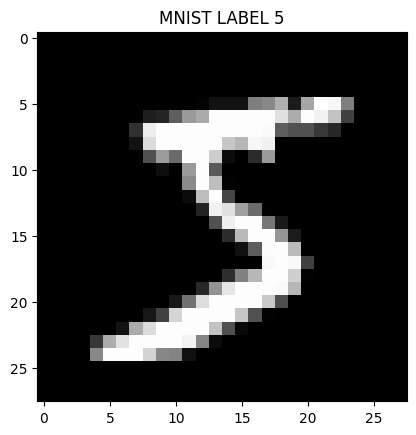

In [8]:
#실행해주세요

# 0번째 이미지 시각화 (원본)
plt.figure()
plt.title("MNIST LABEL {}".format(label))
plt.imshow(image[0], cmap="gray")
plt.show()

In [9]:
# output_1 : max 풀링, 윈도우 크기 = 2
# output_2 : avg 풀링, 윈도우 크기 = 2
# output_3 : max 풀링, 윈도우 크기 = 3
# output_4 : avg 풀링, 윈도우 크기 = 3

max_pool_2 = nn.MaxPool2d(kernel_size=2)
output_1 = max_pool_2(image)
print(output_1.size())

avg_pool_2 = nn.AvgPool2d(kernel_size=2)
output_2 = avg_pool_2(image)
print(output_2.size())

max_pool_3 = nn.MaxPool2d(kernel_size=3)
output_3 = max_pool_3(image)
print(output_3.size())

avg_pool_3 = nn.AvgPool2d(kernel_size=3)
output_4 = avg_pool_3(image)
print(output_4.size())

torch.Size([1, 14, 14])
torch.Size([1, 14, 14])
torch.Size([1, 9, 9])
torch.Size([1, 9, 9])


## 3조 CNN 구현 및 시각화

### 1. CNN 구현, CNN 시각화하기 (25점)

#### 문제1. CNN 시각화 (3점)

In [ ]:
1) 코드의 '???'를 채워주세요. (3점)

In [10]:
# 코드를 실행해주세요.
import numpy as np
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

class_names= ['airplane', 'automobile', ' bird', 'cat', 'deer', 'dog', 'frog',
             'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step


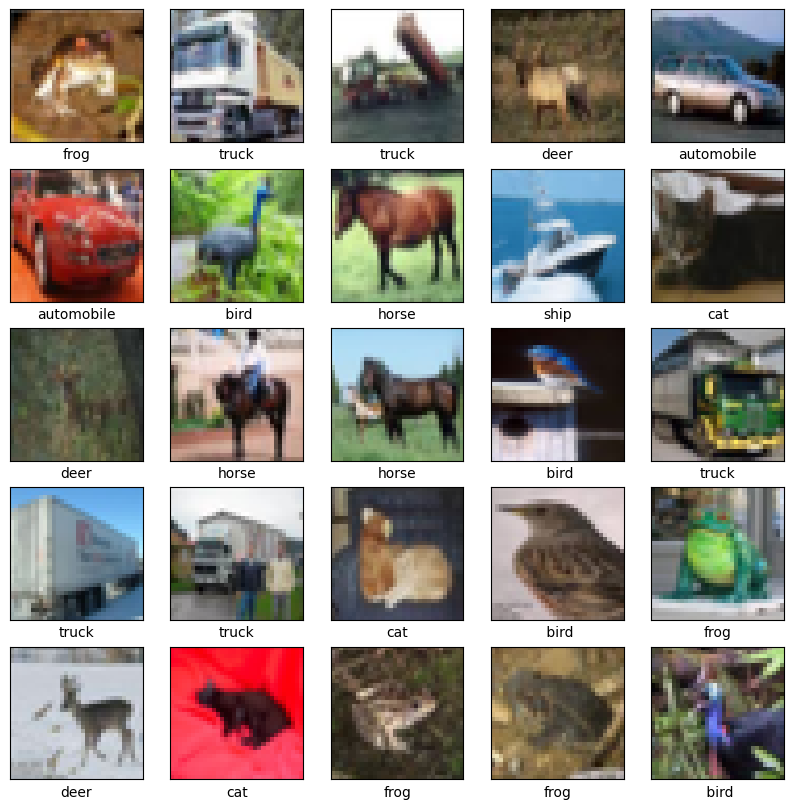

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i]) 
    plt.xlabel(class_names[(y_train[i][0])])

plt.show()

#### 문제2. CNN acc vs CNN_MaxPooling, Dropout acc (10점)

1) CNN acc. 코드의 '???'를 채워주세요. (3점)

In [12]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [13]:
#1. 데이터
datasets = mnist
(x_train, y_train),(x_test, y_test) = datasets.load_data()
#print(datasets.load_data())

# 정규화
x_train, x_test = x_train/255.0, x_test/255.0

print(x_train.shape, y_train.shape)

# 차원수 맞추기
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

#2. 모델구성. ReLU 활성화 함수를 이용해주세요.
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # 드롭아웃 추가 (선택 사항, 과적합 방지)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 3. 컴파일 및 훈련
model.compile(loss='sparse_categorical_crossentropy',  # 다중 클래스 분류를 위한 손실 함수
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=256)

# 4. 평가 및 예측
loss, acc = model.evaluate(x_test, y_test)
print('loss : ', loss)
print('acc : ', acc)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,)


c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.8436 - loss: 0.5078
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9817 - loss: 0.0586
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9903 - loss: 0.0324
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.9927 - loss: 0.0238
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - accuracy: 0.9944 - loss: 0.0185
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.9945 - loss: 0.0165
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9963 - loss: 0.0114
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 22s 95ms/step - accuracy: 0.9963 - loss: 0.0119
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9972 - loss: 0.0084
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9977 - loss: 0.0073
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9886 - loss: 0.0443
loss :  0.031984616070985794
acc :  0.991199

2) CNN_MaxPooling, Dropout acc. 코드의 'A','B'를 채워주세요. (4점)
<br>해당 코드의 '???'는 1)의 '???'와 동일합니다.

In [14]:
# 1. 데이터
datasets = mnist
(x_train, y_train), (x_test, y_test) = datasets.load_data()

# 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, y_train.shape)

# 차원수 맞추기
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# 2. 모델 구성. MaxPooling, Dropout 추가
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling 추가
model.add(Conv2D(64, (3, 3), activation='relu'))  # ReLU 활성화 함수 추가
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling 추가
model.add(Dropout(0.2))  # Dropout 추가
model.add(Flatten())
model.add(Dense(256, activation='relu'))  # ReLU 활성화 함수 추가
model.add(Dense(128, activation='relu'))  # ReLU 활성화 함수 추가
model.add(Dense(10, activation='softmax'))

# 3. 컴파일 및 훈련
model.compile(loss='sparse_categorical_crossentropy',  # 다중 클래스 분류를 위한 손실 함수
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=256)

# 4. 평가 및 예측
loss, acc = model.evaluate(x_test, y_test)
print('loss : ', loss)
print('acc (Dropout & Maxpooling): ', acc)

(60000, 28, 28) (60000,)
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8230 - loss: 0.5955
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9786 - loss: 0.0715
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9859 - loss: 0.0473
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9895 - loss: 0.0349
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9907 - loss: 0.0291
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.9921 - loss: 0.0247
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.9940 - loss: 0.0196
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.9941 - loss: 0.0191
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9944 - loss: 0.0157
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9955 - loss: 0.0134
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9908 - loss: 0.0254
loss :  0.020429624244570732


3) 1)의 acc와 2)의 acc를 적어주고 해당 차이가 왜 발생하였는지 설명해주세요. (3점)

답) 모델 2에서 MaxPooling과 Dropout을 추가함으로써, 더 나은 성능과 높은 정확도를 얻을 수 있는 이유는 이 두 기법이 모델의 일반화 능력을 향상시켰기 때문이다.

#### 문제3. CNN 실습 (15점)

1) 필터의 크기는 3*3, 채널수는 1, 필터의 개수는 5일 때, 코드의 '???'를 채워주세요. (2점)

In [ ]:
# 실행해주세요
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [ ]:
# 이미지화
img=train_x[0]
plt.imshow(img, cmap='gray')
plt.show()

img=img.reshape(-1,28,28,1)

# 컨볼루션 연산 수행 및 시각화
W1=tf.random.normal([3,3,1,5], stddev=0.01)
conv2d=tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
conv2d_img=conv2d.numpy()
conv2d_img=np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray'), plt.show()

2)코드의 '???'를 채워주세요. (2점)

In [ ]:
# Pooling Layer 만들기
pool=tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
pool_img=pool.numpy()
pool_img=np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray'), plt.show()

3) Convolution Layer, Pooling Layer를 거침으로써 이미지들이 어떻게 됐는지, 해당 과정이 CNN에서 어떤 역할을 하는지 설명해주세요. (3점)

답) Convolution Layer는 입력 이미지의 세부적인 특징을 추출하고, Pooling Layer는 이 정보를 요약하여 네트워크의 학습과 추론 성능을 개선한다. cnn에서는 정보 요약, 잡음 감소, 과적합 방지 등의 역할을 한다.

4) 레이어별 파라미터수 계산. 코드의 '???'를 채워주세요. (3점)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

# 데이터 로드
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

# 레이블을 One-Hot Encoding으로 변환
train_y_onehot = to_categorical(train_labels)
test_y_onehot = to_categorical(test_labels)

# 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# 모델 요약 출력
model.summary()


5) 위에 나온 정보를 바탕으로 Convolution Layer에서 conv2d의 가중치, 편향치, 파라미터수를 구하세요. (5점)

가중치 : 288
<br>편향치 : 32
<br>파라미터수 : 320

#### 2. LeNet, AlexNet (25점)

LeNet-5를 파이토치로 구현하는 코드입니다.
<br>데이터는 LeNet을 발표한 논문에서 이용한 MNIST 데이터를 이용하였습니다.
<br>문제 하단의 코드만 수정하시면 됩니다.

In [ ]:
# 필요한 라이브러리 import (그대로 실행하세요.)
import numpy as np
from datetime import datetime

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# parameters 설정

RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 32
N_EPOCHS = 15

IMG_SIZE = 32
N_CLASSES = 10

In [ ]:
# accuracy function, loss function 정의

# 전체 data_loader에 대한 예측의 정확도를 계산하는 함수
def get_accuracy(model, data_loader, device):
    correct_pred = 0
    n = 0

    with torch.no_grad():
        model.eval()
        for X, y_true in data_loader:

            X = X.to(device)
            y_true = y_true.to(device)

            _, y_prob = model(X)
            _, predicted_labels = torch.max(y_prob, 1)

            n += y_true.size(0)
            correct_pred += (predicted_labels == y_true).sum()

    return correct_pred.float() / n

# training과 validation loss를 시각화하는 함수
def plot_losses(train_losses, valid_losses):
    plt.style.use('seaborn')

    train_losses = np.array(train_losses)
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss')
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs",
            xlabel='Epoch',
            ylabel='Loss')
    ax.legend()
    fig.show()

    plt.style.use('default')

In [ ]:
# training data에 사용되는 helper 함수 정의

def train(train_loader, model, criterion, optimizer, device):
    model.train()
    running_loss = 0

    for X, y_true in train_loader:

        optimizer.zero_grad()

        X = X.to(device)
        y_true = y_true.to(device)

        # 순전파
        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

        # 역전파
        loss.backward()
        optimizer.step()

    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

In [ ]:
# validation data에 사용되는 함수 정의
# training loop의 validation 단계에 대한 함수

def validate(valid_loader, model, criterion, device):
    model.eval()
    running_loss = 0

    for X, y_true in valid_loader:

        X = X.to(device)
        y_true = y_true.to(device)

        # 순전파와 손실 기록하기
        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)

    return model, epoch_loss

#### 문제 1. 코드의 '???' 부분을 채워주세요. (2점)

In [ ]:
# training loop 정의하기

def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    # metrics를 저장하기 위한 객체 설정
    best_loss = 1e10
    train_losses = []
    valid_losses = []

    # model 학습하기
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):

            train_acc = get_accuracy(model, train_loader, device)
            valid_acc = get_accuracy(model, valid_loader, device)

            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)

    return model, optimizer, (train_losses, valid_losses)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:10<00:00, 908871.40it/s] 


Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134310.18it/s]


Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1102502.00it/s]


Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9389122.11it/s]


Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



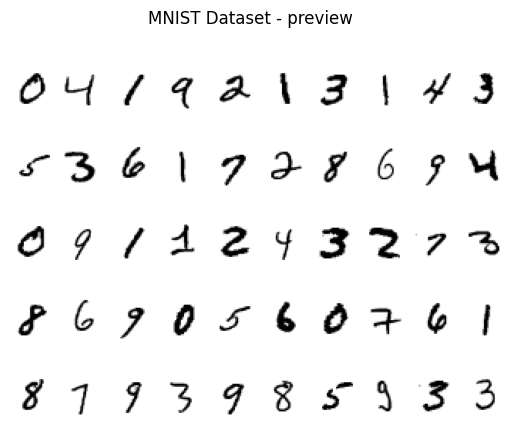

In [ ]:
# data 준비하기
# transforms 정의하기
transforms = transforms.Compose([transforms.Resize((32, 32)),
                                 transforms.ToTensor()])

# data set 다운받고 생성하기
train_dataset = datasets.MNIST(root='mnist_data',
                               train=True,
                               transform=transforms,
                               download=True)

valid_dataset = datasets.MNIST(root='mnist_data',
                               train=False,
                               transform=transforms)

# data loader 정의하기
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=False)

# 불러온 MNIST data 확인하기
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure()
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(train_dataset.data[index], cmap='gray_r')
fig.suptitle('MNIST Dataset - preview');

#### 문제 2. 코드의 '???' 부분을 채워주세요. (4점)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self, n_classes):
        super(LeNet5, self).__init__()

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),                        # LeNet-5의 첫 번째 활성화 함수
            nn.AvgPool2d(kernel_size=2, stride=2),  # 첫 번째 풀링 레이어
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),                        # 두 번째 활성화 함수
            nn.AvgPool2d(kernel_size=2, stride=2),  # 두 번째 풀링 레이어
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()                         # 세 번째 활성화 함수
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=120 * 1 * 1, out_features=84),  # Fully connected layer
            nn.Tanh(),                        # 활성화 함수
            nn.Linear(in_features=84, out_features=n_classes)  # 출력 레이어
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)  # 배치 차원을 제외한 나머지 차원을 평탄화
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)  # 확률을 출력
        return logits, probs


#### 문제 3. 코드의 '???' 부분을 채워주세요. (2점)
- Adam optimizer 사용

In [ ]:
import torch.optim as optim

# 모델, 옵티마이저, 손실 함수 설정하기
torch.manual_seed(RANDOM_SEED)

model = LeNet5(N_CLASSES).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)  # Adam 옵티마이저 사용
criterion = nn.CrossEntropyLoss()  # 손실 함수


#### 문제 4. 코드의 '???' 부분을 채워주세요. (2점)

17:49:59 --- Epoch: 0	Train loss: 0.2290	Valid loss: 0.1020	Train accuracy: 96.84	Valid accuracy: 96.81
17:50:27 --- Epoch: 1	Train loss: 0.0762	Valid loss: 0.0619	Train accuracy: 98.39	Valid accuracy: 98.19
17:50:58 --- Epoch: 2	Train loss: 0.0550	Valid loss: 0.0543	Train accuracy: 98.59	Valid accuracy: 98.45
17:51:27 --- Epoch: 3	Train loss: 0.0438	Valid loss: 0.0486	Train accuracy: 99.07	Valid accuracy: 98.41
17:51:55 --- Epoch: 4	Train loss: 0.0343	Valid loss: 0.0413	Train accuracy: 99.23	Valid accuracy: 98.74
17:52:23 --- Epoch: 5	Train loss: 0.0300	Valid loss: 0.0431	Train accuracy: 99.43	Valid accuracy: 98.67
17:52:53 --- Epoch: 6	Train loss: 0.0235	Valid loss: 0.0466	Train accuracy: 99.41	Valid accuracy: 98.71
17:53:21 --- Epoch: 7	Train loss: 0.0219	Valid loss: 0.0434	Train accuracy: 99.48	Valid accuracy: 98.70
17:53:49 --- Epoch: 8	Train loss: 0.0191	Valid loss: 0.0435	Train accuracy: 99.64	Valid accuracy: 98.80
17:54:18 --- Epoch: 9	Train loss: 0.0167	Valid loss: 0.0499	Trai

<ipython-input-3-48a42c79f411>:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


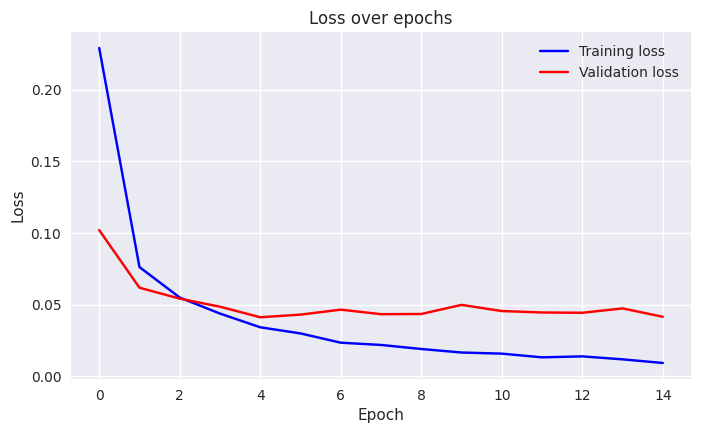

In [ ]:
# 신경망 학습하기

model, optimizer, _ = training_loop(
    model=model,
    criterion=criterion,
    optimizer=optimizer,
    train_loader=train_loader,
    valid_loader=valid_loader,
    epochs=N_EPOCHS,
    device=DEVICE
)

다음은 AlexNet을 사용하여 CIFAR 10 이미지를 분류해보는 문제입니다.
<br>마찬가지로 문제 하단의 코드만 수정해주세요.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

#### 문제 5. 다음 조건에 맞게 AlexNet 모델을 구축하는 코드를 완성해주세요. (4점)
조건 1. Max-pooling layer는 1, 2, 5번째 conv layer 뒤에 위치한다.
<br>조건 2. ReLU는 모든 conv layer와 fc layer 뒤에 위치한다.

In [ ]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, 11, stride=4, padding=2),  # Conv2d(입력채널수, 출력채널수, 필터 크기)
            nn.ReLU(),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(64, 192, 5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(192, 384, 3, padding=1),
            nn.ReLU(),

            nn.Conv2d(384, 256, 3, padding=1),
            nn.ReLU(),

            nn.Conv2d(256, 256, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(3, stride=2),
        )

        # Dense layer 구축
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*3*3, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,512), nn.ReLU(),
            nn.Linear(512,10))

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 256*3*3)
        x = self.classifier(x)
        return x

In [ ]:
alexnet = AlexNet().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=1e-3)

#### 문제 6. 코드의 '???' 부분을 채워주세요. (7점)

In [ ]:
loss_ = []

n = len(trainloader) # 배치 개수

for epoch in range(50):
    running_loss = 0.0
    for data in trainloader:
        inputs, labels = data[0].to(DEVICE), data[1].to(DEVICE) # 배치 데이터
        optimizer.zero_grad() # gradient를 0으로 초기화
        outputs = alexnet(inputs) # 예측값 산출
        loss = criterion(outputs, labels) # 손실 함수 계산
        loss.backward() # 손실 함수 기준으로 역전파 선언
        optimizer.step() # 가중치 최적화
        running_loss += loss.item()

    loss_.append(running_loss / n)
    print('[%d] loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))


#### 문제 7. 코드의 '???' 부분을 채워주세요. (4점)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    alexnet.eval()  # 모델을 평가 모드로 설정
    for data in testloader:
        images, labels = data[0].to(DEVICE), data[1].to(DEVICE)
        outputs = alexnet(images)  # 모델에 입력을 주어 예측값을 얻음
        _, predicted = torch.max(outputs, 1)  # 가장 높은 확률을 가진 클래스 선택
        total += labels.size(0)  # 전체 샘플 수를 누적
        correct += (predicted == labels).sum().item()  # 맞춘 샘플 수를 누적

print('Test accuracy: %.2f %%' % (100 * correct / total))


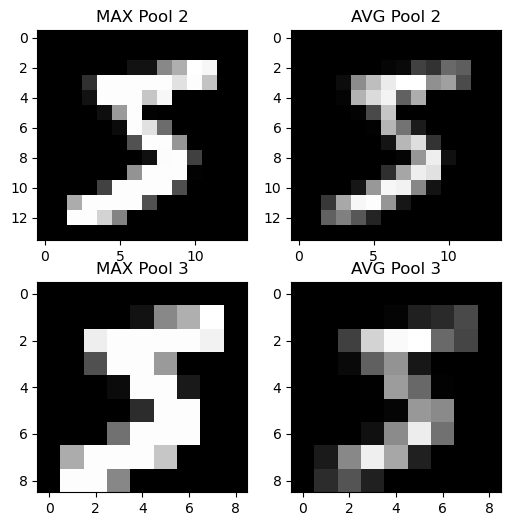

In [7]:
#실행해주세요

fig, axs = plt.subplots(2, 2, figsize=(6, 6)) # figsize는 적절히 조정 가능

# 첫 번째 이미지
axs[0, 0].imshow(output_1[0], cmap='gray')
axs[0, 0].title.set_text('MAX Pool 2')

# 두 번째 이미지
axs[0, 1].imshow(output_2[0], cmap='gray')
axs[0, 1].title.set_text('AVG Pool 2')

# 세 번째 이미지
axs[1, 0].imshow(output_3[0], cmap='gray')
axs[1, 0].title.set_text('MAX Pool 3')

# 네 번째 이미지
axs[1, 1].imshow(output_4[0], cmap='gray')
axs[1, 1].title.set_text('AVG Pool 3')

# 전체 그림을 보여줍니다.
plt.show()